In [418]:
import pandas as pd
import json
from flatten_json import flatten

In [419]:
def duplicate_columns(df:pd.DataFrame)->pd.DataFrame:
    '''https://github.com/pandas-dev/pandas/issues/11250'''
    groups = df.columns.to_series().groupby(df.dtypes).groups
    dups = []

    for t, v in groups.items():

        cs = df[v].columns
        vs = df[v]
        lcs = len(cs)

        for i in range(lcs):
            iv = vs.iloc[:,i].tolist()
            for j in range(i+1, lcs):
                jv = vs.iloc[:,j].tolist()
                if iv == jv:
                    dups.append(cs[i])
                    break
    return df.drop(columns=dups,axis=1)

def rename_dupped_cols(df:pd.DataFrame)->pd.DataFrame:
    duplicated_columns_list = []
    list_of_all_columns = list(df.columns)
    for column in list_of_all_columns:
        if list_of_all_columns.count(column) > 1 and not column in duplicated_columns_list:
            duplicated_columns_list.append(column)
    for column in duplicated_columns_list:
        list_of_all_columns[list_of_all_columns.index(column)] = column + '_1'
        list_of_all_columns[list_of_all_columns.index(column)] = column + '_2'
    df.columns = list_of_all_columns
    return df

def process_data(file_name:str,nested_json)->pd.DataFrame:
    indf = pd.read_csv(file_name)
    df=indf
    df.replace('("")','"',regex=True, inplace = True)
    dic_flattened = [flatten(json.loads(d)) for d in df._raw.values]
    df = pd.concat([df.drop(columns=nested_json),pd.DataFrame(dic_flattened)],axis=1)
    df = rename_dupped_cols(df)
    df =duplicate_columns(df)
    return indf, df
    


In [420]:
file = 'logdata.csv'
indf , df=process_data(file,['_raw',])

C:\Users\Derek\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (11,54,55,56,57,58,59,60,61,62,63,64,67,69,73,75,76,77,78,79,80,81,83,84,86,87,88,89,91,92,93,94,95,96,101,111,113,114,115,116,117,120,121,122,123,124,125,126,135,140,141,142,143,148,149,150,151,152,153,154,157,158,160,163,170,171,172,173,175,176,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,237,238,255,257,258,259,272,273,283,308) have mixed types.Specify dtype option on import or set low_memory=False.
  


In [556]:
indf

_bkt          _cd  \
0     botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E  307:1010563   
1     botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E  307:1010534   
2     botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E  307:1010505   
3     botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E  307:1010476   
4     botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E  307:1010450   
...                                               ...          ...   
5445  botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E  303:3006968   
5446  botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E  303:3006923   
5447  botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E  303:3006878   
5448  botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E  303:3006830   
5449  botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E  303:3006782   

     _eventtype_color  _indextime  \
0                 NaN  1534777232   
1                 NaN  1534777232   
2                 NaN  1534777232   
3                 NaN  1534777232   
4                 NaN  1534777232   
...               ...         ...   
5445             none  1534757621   
5446             none  1534757621   
5447             none  1534757621   
5448             none  1534757621   
5449             none  1534757621   

                                                   _raw     _sourcetype  \
0     {"requestParameters": {"filterSet": {"items": ...  aws:cloudtrail   
1     {"requestParameters": {"filterSet": {"items": ...  aws:cloudtrail   
2     {"requestParameters": {"filterSet": {"items": ...  aws:cloudtrail   
3     {"requestParameters": {"filterSet": {"items": ...  aws:cloudtrail   
4     {"requestParameters": {"securityGroupIdSet": {...  aws:cloudtrail   
...                                                 ...             ...   
5445  {"sourceIPAddress": "139.198.18.205", "eventTi...  aws:cloudtrail   
5446  {"sourceIPAddress": "139.198.18.205", "eventTi...  aws:cloudtrail   
5447  {"sourceIPAddress": "139.198.18.205", "eventTi...  aws:cloudtrail   
5448  {"sourceIPAddress": "139.198.18.205", "eventTi...  aws:cloudtrail   
5449  {"sourceIPAddress": "139.198.18.205", "eventTi...  aws:cloudtrail   

           _time   action additionalEventData.LoginTo  \
0     1534776810      NaN                         NaN   
1     1534776809      NaN                         NaN   
2     1534776809      NaN                         NaN   
3     1534776809      NaN                         NaN   
4     1534776809      NaN                         NaN   
...          ...      ...                         ...   
5445  1534756913  created                         NaN   
5446  1534756910  created                         NaN   
5447  1534756924  created                         NaN   
5448  1534756894  created                         NaN   
5449  1534756918  created                         NaN   

     additionalEventData.MFAUsed  ...  \
0                            NaN  ...   
1                            NaN  ...   
2                            NaN  ...   
3                            NaN  ...   
4                            NaN  ...   
...                          ...  ...   
5445                         NaN  ...   
5446                         NaN  ...   
5447                         NaN  ...   
5448                         NaN  ...   
5449                         NaN  ...   

                                          user_arn user_group_id  \
0     arn:aws:iam::622676721278:user/splunk_access  6.230000e+11   
1     arn:aws:iam::622676721278:user/splunk_access  6.230000e+11   
2     arn:aws:iam::622676721278:user/splunk_access  6.230000e+11   
3     arn:aws:iam::622676721278:user/splunk_access  6.230000e+11   
4     arn:aws:iam::622676721278:user/splunk_access  6.230000e+11   
...                                            ...           ...   
5445      arn:aws:iam::622676721278:user/web_admin  6.230000e+11   
5446      arn:aws:iam::622676721278:user/web_admin  6.230000e+11   
5447      arn:aws:iam::622676721278:user/web_admin  6.230000e+11   
5448

In [422]:
for col in df.columns:
    try:
        if len(df[col].unique())==1:
            df.drop(columns=[col],axis=1,inplace=True)
    except: 
        print('error with ',col)
        df[col]=df[col].str.replace("{}","")

error with  requestParameters_instancesSet
error with  requestParameters_securityGroupIdSet
error with  requestParameters_filterSet
error with  requestParameters_securityGroupSet


C:\Users\Derek\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


error with  requestParameters_volumeSet
error with  requestParameters_executableBySet
error with  requestParameters_ownersSet
error with  requestParameters_vpcSet
error with  requestParameters_sharedUsersSet
error with  requestParameters_snapshotSet
error with  requestParameters_imagesSet
error with  responseElements_tagDescriptions_0_tags
error with  requestParameters_subnetSet
error with  requestParameters_keySet
error with  requestParameters_reservedInstancesSet
error with  requestParameters_networkAclIdSet
error with  requestParameters_configRuleNames
error with  requestParameters_publicIpsSet
error with  responseElements_configRules
error with  responseElements_loadBalancers
error with  requestParameters_placementGroupSet
error with  requestParameters_availabilityZoneSet
error with  requestParameters_ipPermissions_items_1_ipRanges
error with  responseElements_evaluationResults
error with  requestParameters_blockDeviceMapping
error with  requestParameters_CreateDefaultVpcRequest
er

In [423]:
for col in df:
    if len(df[col].unique()) > 50:
        print('dropping ', col)
        df.drop(columns=[col],axis=1,inplace=True)


"for col in df:\n    if len(df[col].unique()) > 50:\n        print('dropping ', col)\n        df.drop(columns=[col],axis=1,inplace=True)\n"

In [424]:
df

_bkt          _cd  \
0     botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E  307:1010563   
1     botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E  307:1010534   
2     botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E  307:1010505   
3     botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E  307:1010476   
4     botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E  307:1010450   
...                                               ...          ...   
5445  botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E  303:3006968   
5446  botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E  303:3006923   
5447  botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E  303:3006878   
5448  botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E  303:3006830   
5449  botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E  303:3006782   

     _eventtype_color  _indextime       _time   action  \
0                 NaN  1534777232  1534776810      NaN   
1                 NaN  1534777232  1534776809      NaN   
2                 NaN  1534777232  1534776809      NaN   
3                 NaN  1534777232  1534776809      NaN   
4                 NaN  1534777232  1534776809      NaN   
...               ...         ...         ...      ...   
5445             none  1534757621  1534756913  created   
5446             none  1534757621  1534756910  created   
5447             none  1534757621  1534756924  created   
5448             none  1534757621  1534756894  created   
5449             none  1534757621  1534756918  created   

     additionalEventData.vpcEndpointId apiVersion_1 authentication_method  \
0                                  NaN          NaN                   NaN   
1                                  NaN          NaN                   NaN   
2                                  NaN          NaN                   NaN   
3                                  NaN          NaN                   NaN   
4                                  NaN          NaN                   NaN   
...                                ...          ...                   ...   
5445                               NaN          NaN                   NaN   
5446                               NaN          NaN                   NaN   
5447                               NaN          NaN                   NaN   
5448                               NaN          NaN                   NaN   
5449                               NaN          NaN                   NaN   

     change_type  ...  responseElements_credentials_accessKeyId  \
0            EC2  ...                                       NaN   
1            EC2  ...                                       NaN   
2            EC2  ...                                       NaN   
3            EC2  ...                                       NaN   
4            EC2  ...                                       NaN   
...          ...  ...                                       ...   
5445         EC2  ...                                       NaN   
5446         EC2  ...                                       NaN   
5447         EC2  ...                                       NaN   
5448         EC2  ...                                       NaN   
5449         EC2  ...                                       NaN   

      requestParameters_serviceName  responseElements_isTruncated  \
0                               NaN                           NaN   
1                               NaN                           NaN   
2                               NaN                           NaN   
3                               NaN                           NaN   
4                               NaN                           NaN   
...                             ...                           ...   
5445                            NaN                           NaN   
5446                            NaN                           NaN   
5447                            NaN                           NaN   
5448                            NaN                           NaN   
5449                  

In [425]:
dfs=[]
for col in df.columns:
    if df[col].dtypes == object:
        dfs.append(pd.get_dummies(df[col]))
        df.drop(columns=[col],axis=1,inplace=True)
        print(col)
    
    #pd.get_dummies(df._bkt)

_bkt
_cd
_eventtype_color
action
additionalEventData.vpcEndpointId
apiVersion_1
authentication_method
change_type
dest
eventtype
msg
object_category
object_id
punct
requestID_1
requestParameters.AccessControlPolicy.AccessControlList.Grant{}.Grantee.DisplayName
requestParameters.AccessControlPolicy.AccessControlList.Grant{}.Grantee.ID
requestParameters.AccessControlPolicy.AccessControlList.Grant{}.Grantee.URI
requestParameters.AccessControlPolicy.AccessControlList.Grant{}.Grantee.xmlns:xsi
requestParameters.AccessControlPolicy.AccessControlList.Grant{}.Grantee.xsi:type
requestParameters.AccessControlPolicy.AccessControlList.Grant{}.Permission
requestParameters.AccessControlPolicy.Owner.DisplayName
requestParameters.AccessControlPolicy.Owner.ID
requestParameters.AccessControlPolicy.xmlns
requestParameters.DescribeHostsRequest.Filter.Name
requestParameters.DescribeHostsRequest.Filter.Value.content
requestParameters.DescribeInstanceCreditSpecificationsRequest.InstanceId.content
requestPara

In [426]:
dfs.append(df)


In [427]:
df=pd.concat(dfs,axis=1)

In [428]:
from sklearn.cluster import KMeans
import numpy as np

scaler = StandardScaler()

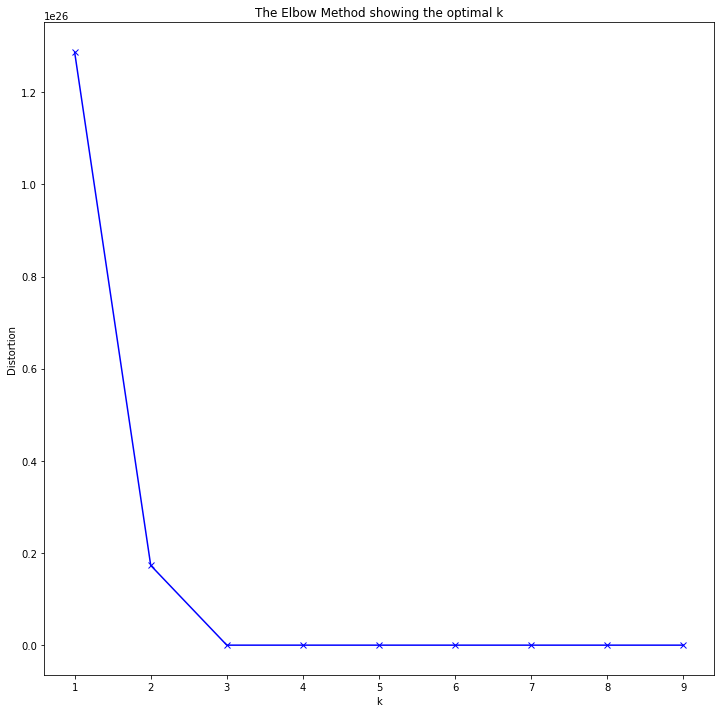

In [429]:
import matplotlib.pyplot as plt
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter = 500)
    kmeanModel.fit(df.fillna(0).to_numpy())
    distortions.append(kmeanModel.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()    

In [445]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
x = scaler.fit_transform(df.fillna(0).to_numpy())

pca = PCA().fit(x)

plt.rcParams["figure.figsize"] = (12,12)

fig, ax = plt.subplots()

yi = np.cumsum(pca.explained_variance_ratio_)
xi = np.arange(1, len(yi)+1, step=1)
plt.ylim(0.0,1.1)
#plt.xlim(0.0,1000)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 1, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [431]:
X = PCA(n_components=300, svd_solver='full').fit_transform(x)

In [432]:
#X = df.fillna(0).to_numpy()
#X=scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_



array([0, 0, 0, ..., 1, 1, 1])

In [433]:
kmeans.labels_.sum()/len(kmeans.labels_)

0.11284403669724771

In [434]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [435]:
metrics.silhouette_score(X, kmeans.labels_)

0.06942973769035597

In [436]:
metrics.calinski_harabasz_score(X, kmeans.labels_)

80.21446545514596

In [437]:
#This scaled data can then be fed into the HAC algorithm
from sklearn.cluster import AgglomerativeClustering
#We can tell it how many clusters we're aiming for
agg_clust = AgglomerativeClustering(n_clusters=2)
assigned_clusters = agg_clust.fit_predict(X)

In [438]:
assigned_clusters.sum()/len(assigned_clusters)

0.011376146788990826

In [439]:
metrics.silhouette_score(X, assigned_clusters)

0.5503191266550099

In [440]:
metrics.calinski_harabasz_score(X, assigned_clusters)

260.4087663029311

In [441]:
from time import time

for linkage in ( "average", "complete", "single","ward"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=2)
    t0 = time()
    assigned_clusters=clustering.fit_predict(X)
    print('malware proportion:{}'.format(assigned_clusters.sum()/len(assigned_clusters)))
    print('Shilhouette Score:{}'.format(metrics.silhouette_score(X, assigned_clusters)))
    print('calinski_harabasz_score Score:{}'.format(metrics.calinski_harabasz_score(X, assigned_clusters)))
    print("%s :\t%.2fs" % (linkage, time() - t0))

malware proportion:0.0001834862385321101
Shilhouette Score:0.8601618057171349
calinski_harabasz_score Score:57.28642873859328
average :	6.86s
malware proportion:0.0001834862385321101
Shilhouette Score:0.8601618057171349
calinski_harabasz_score Score:57.28642873859328
complete :	6.29s
malware proportion:0.0001834862385321101
Shilhouette Score:0.8601618057171349
calinski_harabasz_score Score:57.28642873859328
single :	6.21s
malware proportion:0.011376146788990826
Shilhouette Score:0.5503191266550099
calinski_harabasz_score Score:260.4087663029311
ward :	6.51s


In [442]:
assigned_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [443]:
sum([1 if x else 0 for x in assigned_clusters==kmeans.labels_])

4773

In [449]:
indf['requestParameters.GetConsoleScreenshotRequest.WakeUp']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5445    NaN
5446    NaN
5447    NaN
5448    NaN
5449    NaN
Name: requestParameters.GetConsoleScreenshotRequest.WakeUp, Length: 5450, dtype: object

In [453]:
X

array([[-1.31737515, -0.24520022,  0.67010289, ..., -0.37870506,
         4.30851881,  2.06306809],
       [-1.30450648, -0.24494049,  0.66957376, ..., -0.67344877,
         3.18333342,  1.40035137],
       [-1.30448512, -0.24494252,  0.66955712, ..., -0.64263303,
         3.11659269,  1.35733119],
       ...,
       [-2.01938282, -1.63822886, -8.72169102, ..., -0.77528749,
         0.46006504, -0.85687668],
       [-2.02078884, -1.64094555, -8.74013553, ..., -0.85538436,
         1.04117135, -1.24523359],
       [-2.02078093, -1.64090138, -8.74002635, ..., -1.17896807,
         1.44369576, -1.25104156]])

In [454]:
#Training the SOM gapminder
from minisom import MiniSom


In [552]:
data = X
# data normalization


# Initialization and training
som_shape = (1,2)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 10000, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 43.23640155587223


In [541]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

In [548]:
winner_coordinates

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

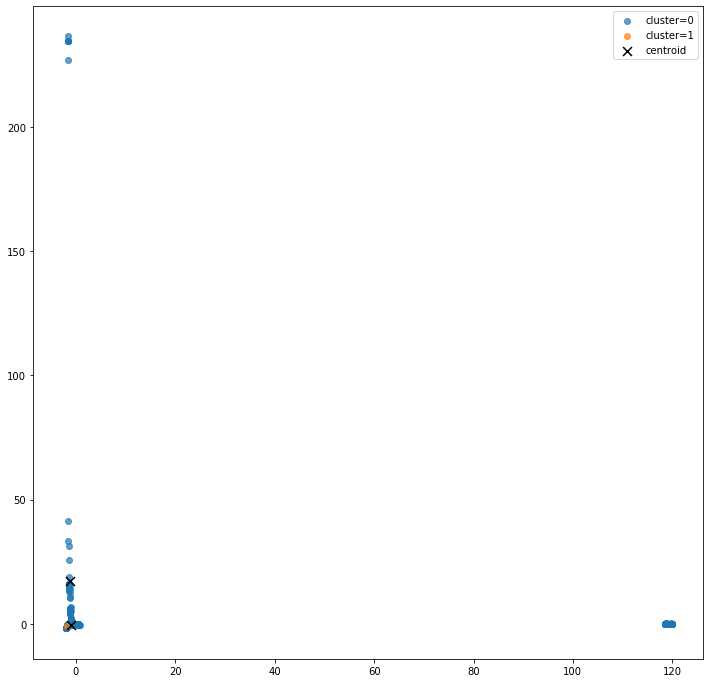

In [550]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,12)
#plt.ylim(-2,1)
#plt.xlim(-2,1)
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=80, linewidths=35, color='k', label='centroid')

plt.legend()

In [564]:
cluster_index

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)